# Project 1 - Group 72
### Matteo Boglioni - Federica Bruni - Paula Momo Cabrera

## Part 1

### Import Libraries and Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
import shap

In [6]:
train_df = pd.read_csv("datasets/heart_failure/train_val_split.csv")
test_df = pd.read_csv("datasets/heart_failure/test_split.csv")

In [7]:
print(train_df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     37   M           ATA        130          283          0         ST   
2     48   F           ASY        138          214          0     Normal   
3     54   M           NAP        150          195          0     Normal   
4     39   M           NAP        120          339          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
729   41   M           ATA        120          157          0     Normal   
730   57   F           ASY        140          241          0     Normal   
731   45   M            TA        110          264          0     Normal   
732   68   M           ASY        144          193          1     Normal   
733   57   M           ASY        130          131          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

| Variable          | Explanation   | 
|:-----------------:|:-------------:|
|  Age              |  Intituively, with age progression follows higher risks               |
|  Sex              |  Male population is generally more sensible to heart diseases         |
|  ChestPainType    |  TA: typical angina, classic chest pain. <br> ATA: atypical angina.<br>      NAP: non-anginal pain <br> ASY: asymptomatic,common for diabetes patients to be  <br> asymptomatic even during heart attacks (due to neuropathy)|
|  RestingBP        |  Resting BloodPressure, symptom of hypertension if too high. Increases stroke risks       |
|  Cholesterol      |  High cholesterol levels increase predisposition to atherosclerosis-->leads to ACS        |
|  FastingBS        |  Fasting blood sugar, over 126 it's automatically a diagnose of diabetes                  |
|  RestingECG       |  Normal: all looks good. ST: potential disturbances in rhythm, LVH: left ventricle hypertrophy.|
|  MaxHR            |  Higher heart rates can be symptom of heart failure                                       |
|  ExerciseAngina   |  Angina during exercise, symptom of ischemia                                              |
|  Oldpeak          |  ST depression induced by exercise relative to rest                                       |
|  ST_Slope         |               |

In [8]:
for col in categorical_features:
    train_df[col]=label_encoder.fit_transform(train_df[col])
    test_df[col]=label_encoder.transform(test_df[col])

# 1 - encode categorical data
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoder = LabelEncoder()



# 2 - delete unsensical data
train_df = train_df[train_df['Cholesterol'] > 0]
test_df = test_df[test_df['Cholesterol'] > 0]
train_df = train_df[train_df['Oldpeak'] > 0]
test_df = test_df[test_df['Oldpeak'] > 0]

# 3 - normalization
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
feat_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('all', feat_transformer, numerical_features + categorical_features)
    ],
    remainder='passthrough' 
)
train_preprocessed_raw = preprocessor.fit_transform(train_df)
test_preprocessed_raw = preprocessor.transform(test_df)
# 4 - back into df shape
processed_columns = numerical_features + categorical_features + ['HeartDisease']
train_preprocessed = pd.DataFrame(train_preprocessed_raw, columns=processed_columns)
test_preprocessed = pd.DataFrame(test_preprocessed_raw, columns=processed_columns)
# 5 - split X,y
X_train = train_preprocessed.drop(columns=['HeartDisease'])
y_train = train_preprocessed['HeartDisease']
X_test = test_preprocessed.drop(columns=['HeartDisease'])
y_test = test_preprocessed['HeartDisease']


In [9]:
model = MLPClassifier(activation='logistic',hidden_layer_sizes=(11,),solver='adam',max_iter=500,random_state=25)
model.fit(X_train,y_train)
print(model.score(X_test, y_test))


0.865979381443299


  0%|          | 0/97 [00:00<?, ?it/s]

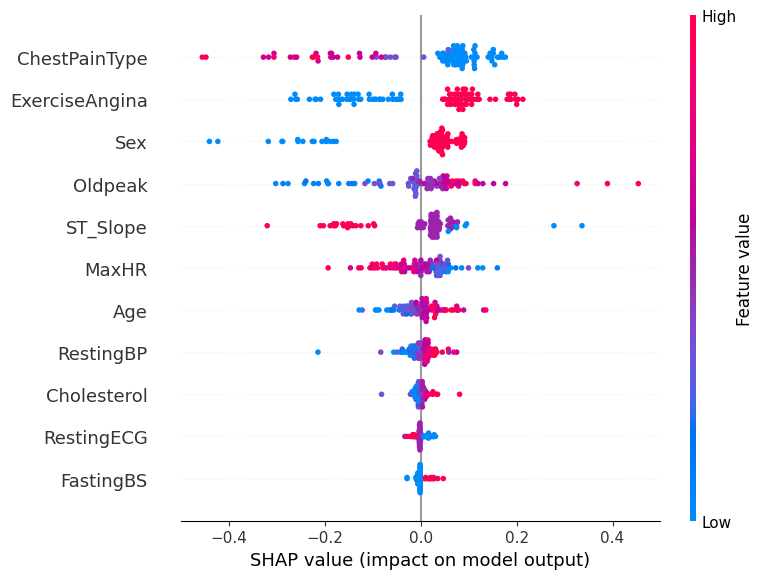

In [10]:
explainer = shap.KernelExplainer(model.predict,X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test,feature_names=X_test.columns.values)

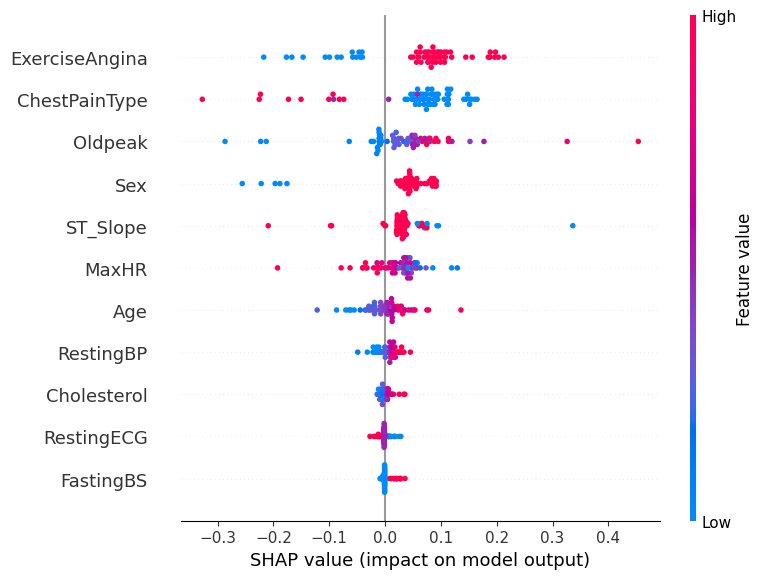

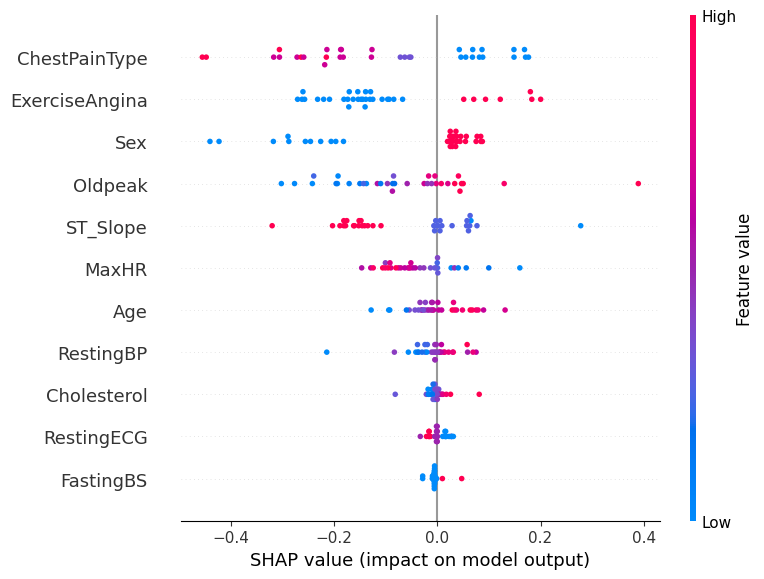

In [11]:
positives = y_test[(y_test == 1)]
negatives = y_test[(y_test == 0)]

#POSITIVES PLOT
shap.summary_plot(shap_values[(y_test == 1)],X_test[(y_test==1)],feature_names=X_test.columns.values)
#NEGATIVES PLOT
shap.summary_plot(shap_values[(y_test == 0)],X_test[(y_test==0)],feature_names=X_test.columns.values)